Part I
---


| Var | (a, sigma^2) | n | q | k | Rule | Law |
| --- | --- | --- | --- | --- | --- | --- |
| 5 | (0;9) | 60 | 1.75 | 3 | Стерджеса | Треугольное на отрезке (-2, 4) и модой, равной 1 |


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import pandas as pd
import math
import statistics

# consts
n = 6000
a = 0
sigma = 3
q = 1.75

left = -2
right = 4
mode = 1

my_c = (mode - left)/(right-left)
my_loc = left
my_scale = right-left

Task 1


In [3]:
sample = sts.norm.rvs(loc=a, scale=sigma, size=n)
print(sample)

[ 2.47104313 -3.73469107 -4.65524838 ... -3.21099484  2.41293494
 -3.93995149]


In [4]:
n_intervals = int(1 + 3.32*math.log10(n))+1
min_smpl = sample.min()
max_smpl = sample.max()
h = (max_smpl-min_smpl)/n_intervals

print(f"Количество интервалов: {n_intervals}\nДлина интервала: {h}\nМаксимальный: {max_smpl}\nМинимальный элемент: {min_smpl} ")

Количество интервалов: 14
Длина интервала: 1.582625314480842
Максимальный: 11.70181254747086
Минимальный элемент: -10.454941855260929 


In [5]:
intervals = []
for i in range(0, n_intervals):
    print(f'{i+1} interval: {min_smpl+i*h} - {min_smpl+(i+1)*h}')
    intervals.append(min_smpl+i*h)
intervals.append(min_smpl+n_intervals*h)

1 interval: -10.454941855260929 - -8.872316540780087
2 interval: -8.872316540780087 - -7.289691226299245
3 interval: -7.289691226299245 - -5.707065911818402
4 interval: -5.707065911818402 - -4.124440597337561
5 interval: -4.124440597337561 - -2.541815282856719
6 interval: -2.541815282856719 - -0.9591899683758758
7 interval: -0.9591899683758758 - 0.6234353461049658
8 interval: 0.6234353461049658 - 2.2060606605858073
9 interval: 2.2060606605858073 - 3.788685975066649
10 interval: 3.788685975066649 - 5.37131128954749
11 interval: 5.37131128954749 - 6.953936604028334
12 interval: 6.953936604028334 - 8.536561918509177
13 interval: 8.536561918509177 - 10.119187232990017
14 interval: 10.119187232990017 - 11.70181254747086


In [6]:
frequency = []
arraySort = list(sample)
arraySort.sort()
for i in range(0, len(intervals)-1):
    frequency.append(0)
    for j in arraySort:
        if j >= intervals[i] and j <= intervals[i+1]:
            frequency[i] += 1
for i in range(0, len(frequency)):
    print(f'{i+1} interval: {frequency[i]}')
frequency = np.array(frequency)

print(f'\nСумма частот - {(frequency/n).sum()}')



1 interval: 16
2 interval: 36
3 interval: 115
4 interval: 354
5 interval: 664
6 interval: 1074
7 interval: 1220
8 interval: 1087
9 interval: 787
10 interval: 429
11 interval: 160
12 interval: 46
13 interval: 9
14 interval: 3

Сумма частот - 0.9999999999999998


14
[-10.45494186  -8.87231654  -7.28969123  -5.70706591  -4.1244406
  -2.54181528  -0.95918997   0.62343535   2.20606066   3.78868598
   5.37131129   6.9539366    8.53656192  10.11918723  11.70181255]
14
[-10.454941855260929, -8.872316540780087, -7.289691226299245, -5.707065911818402, -4.124440597337561, -2.541815282856719, -0.9591899683758758, 0.6234353461049658, 2.2060606605858073, 3.788685975066649, 5.37131128954749, 6.953936604028334, 8.536561918509177, 10.119187232990017, 11.70181254747086]


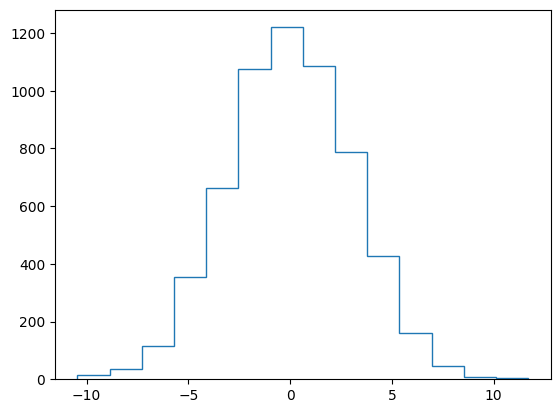

In [7]:
counts, bins = np.histogram(sample, bins='sturges')
plt.stairs(counts, bins)
print(len(counts))
print(bins)

print((len(frequency)))
print(intervals)

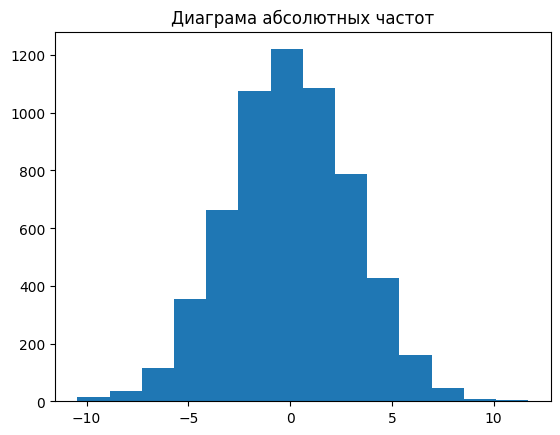

In [8]:
plt.title("Диаграма абсолютных частот")
plt.stairs(frequency, intervals, fill=True)

In [9]:
my_pdf = frequency/(h*n)
for i in range(0, len(my_pdf)):
    print(f'{i+1} interval: {my_pdf[i]}')
# print(f'Сумма абсолютных частот {tmp.sum()}')

1 interval: 0.0016849639913294509
2 interval: 0.0037911689804912643
3 interval: 0.012110678687680428
4 interval: 0.0372798283081641
5 interval: 0.0699260056401722
6 interval: 0.11310320791798939
7 interval: 0.12847850433887062
8 interval: 0.11447224116094457
9 interval: 0.08287916632351737
10 interval: 0.0451780970175209
11 interval: 0.01684963991329451
12 interval: 0.0048442714750721715
13 interval: 0.0009477922451228161
14 interval: 0.000315930748374272


[0.00168496 0.00379117 0.01211068 0.03727983 0.06992601 0.11310321
 0.1284785  0.11447224 0.08287917 0.0451781  0.01684964 0.00484427
 0.00094779 0.00031593]
0.6318614967485441


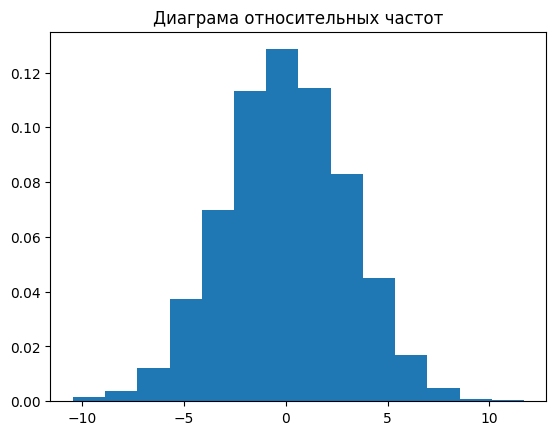

In [10]:
plt.title("Диаграма относительных частот")
plt.stairs(my_pdf, intervals, fill=True)
print(my_pdf)
print(my_pdf.sum())

Task 2

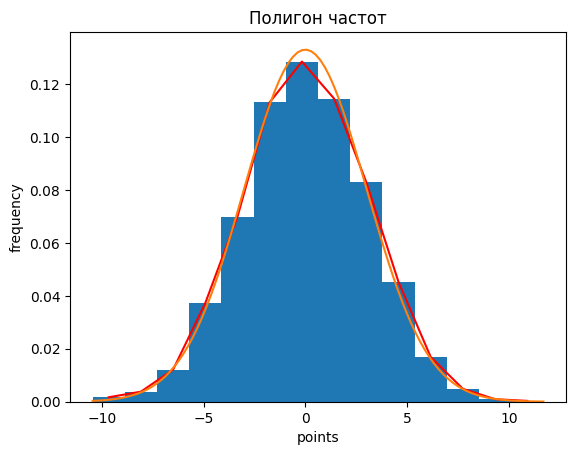

In [11]:
lineY = []
for i in my_pdf:
    lineY.append(i)
lineX = []
for i in range(0, len(intervals)-1):
    lineX.append(intervals[i]+h/2)
plt.stairs(my_pdf, intervals, fill=True)
plt.plot(lineX, lineY, color="red")

x = np.linspace(min_smpl, max_smpl, 100)
plt.plot(x, sts.norm.pdf(x, a, sigma))

plt.title('Полигон частот')
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()

In [12]:
# check
proof = 0 
for i in frequency/n/h:
    proof+=i*h
print("Сумма площадей под графиком: ", proof)


Сумма площадей под графиком:  0.9999999999999999


Function graph

In [13]:
arrayGraph = []
tmp1= frequency/n
for i in range(0, len(tmp1)):
    arrayGraph.append(0)
    for j in range (0, i):
        arrayGraph[i]+=tmp1[j]
cdfY = []
for i in arrayGraph:
    cdfY.append(i)
cdfY.append(1)
cdfX = []
for i in intervals:
    cdfX.append(i)


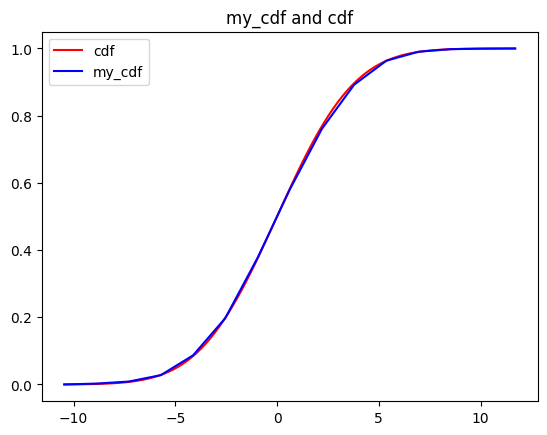

In [14]:
# fig, ax = plt.subplots()
# for i in range(0, len(arrayGraph)):
#     ax.hlines(y=arrayGraph[i], xmin=intervals[i], xmax=intervals[i+1], linewidth=2, color='r')
    
# ax.hlines(y=1, xmin=intervals[len(intervals)-1], xmax=intervals[len(intervals)-1]+10, linewidth=2, color='r')
# ax.hlines(y=0, xmin=intervals[0]-10, xmax=intervals[0], linewidth=2, color='r')
# plt.plot(x, sts.norm.cdf(x, a, sigma))
# ---------------------------------------------------


x = np.linspace(min_smpl, max_smpl, 100)
plt.plot(x, sts.norm.cdf(x, a, sigma), color="red")

plt.plot(cdfX, cdfY, color="blue")
plt.legend(['cdf', 'my_cdf'])
plt.title("my_cdf and cdf")
plt.show()

,X
0.25,-2.027380
0.50,0.007957
0.75,2.091797


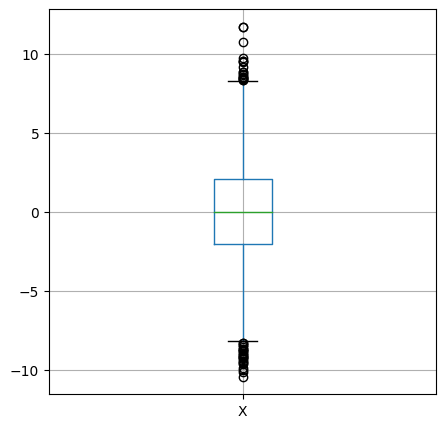

In [15]:
df = pd.DataFrame(data=sample,columns=['X'])
df.boxplot(figsize = (5, 5))
df.quantile([0.25,0.5,0.75])

part 3


In [16]:
print(q)
print(f"Вероятность по таблице {0.4599*2}")
print(f"Вероятность по lib {sts.norm().cdf(q)-sts.norm().cdf(-q)}")

prob = 0
for i in sample:
    if i > a - (q*sigma) and i < a+(q*sigma):
        prob += 1
prob /= n
print(f"Статистическая {prob}")

1.75
Вероятность по таблице 0.9198
Вероятность по lib 0.9198816862723658
Статистическая 0.9196666666666666


part 4

In [17]:
tem1 = frequency/n
sample 

my_mean = statistics.mean(sample)
my_variacne = statistics.variance(sample)
my_dev = math.sqrt(my_variacne)
my_skewness = sts.skew(sample)
my_kurtosis = sts.kurtosis(sample)
print(f'mean - {my_mean}, \nvariacne - {my_variacne}, \ndev - {my_dev}, \nSkewness - {my_skewness}, \nKurtosis - {my_kurtosis}')


mean - 0.01609481374013326, 
variacne - 9.203888230763285, 
dev - 3.0337910657728697, 
Skewness - -0.02213463860104472, 
Kurtosis - 0.001548377966331227


In [18]:
X = sample.sum()/len(sample)
print(f'Первый эмпирический момент: {X}')
s2 = 0
for i in sample:
    s2 += (i-X)**2
s2 = s2/len(sample)
print(f'Эмпирическая дисперсия: {s2}')
print(f'Стандартное отклонение: {math.sqrt(s2)}')
print(f'S^2: {(s2)*len(sample)/(len(sample)-1)}')

x4 = 0
s3 = 0
s4 = 0
for i in sample:
    x4 += math.pow(i, 4)
    s3 += math.pow((i-X), 3)
    s4 += math.pow((i-X), 4)
x4 /= len(sample)
s3 /= len(sample)
s4 /= len(sample)
print(f'Коэффициент ассимметрии: {s3/math.pow(math.sqrt(s2), 3)}')
print(f'Коэффициент эксцесса: {s4/math.pow(s2, 2)-3}')

Первый эмпирический момент: 0.016094813740133267
Эмпирическая дисперсия: 9.202354249391473
Стандартное отклонение: 3.033538239315844
S^2: 9.203888230763265
Коэффициент ассимметрии: -0.022134638601044743
Коэффициент эксцесса: 0.0015483779663476582
